In [ ]:
import numpy as np

def conv1d(x, w, p=0, s=1):
  w_rot = np.array(w[::-1])
  x_padded = np.array(x)
  if p>0:
    zero_pad = np.zeros(shape=p)
    x_padded = np.concatenate([
        zero_pad, x_padded, zero_pad
    ])
  res = []
  for i in range(0, int(len(x_padded) - len(w_rot)) + 1, s):
    res.append(np.sum(x_padded[i:i+w_rot.shape[0]]*w_rot))
  return np.array(res)

#testing
x = [1,3,2,4,5,6,1,3]
w = [1,0,3,1,2]
print("Conv1d implemantation: ",
      conv1d(x, w, p=2, s=1))
print("Numpy results: ",
      np.convolve(x,w,mode="same"))

Conv1d implemantation:  [ 5. 14. 16. 26. 24. 34. 19. 22.]
Numpy results:  [ 5 14 16 26 24 34 19 22]


In [ ]:
import numpy as np
import scipy.signal

def conv2d(X, W, p=(0,0), s=(1,1)):
  W_rot = np.array(W)[::-1, ::-1]
  X_orig = np.array(X)
  n1 = X_orig.shape[0] + 2*p[0]
  n2 = X_orig.shape[1] * 2*p[1]
  X_padded = np.zeros(shape=(n1,n2))
  X_padded[p[0]:p[0]+X_orig.shape[0],
           p[1]:p[1]+X_orig.shape[1]] = X_orig

  res = []
  for i in range(0, int((X_padded.shape[0]-W_rot.shape[0])/s[0])+1, s[0]):
    res.append([])
    for j in range(0, int((X_padded.shape[1]-W_rot.shape[1])/s[1])+1, s[1]):
      X_sub = X_padded[i:i+W_rot.shape[0],
                       j:j+W_rot.shape[1]]
      res[-1].append(np.sum(X_sub * W_rot))
  return (np.array(res))

X = [[1, 3, 2, 4], [5, 6, 1, 3], [1, 2, 0, 2], [3, 4, 3, 2]]
W = [[1, 0, 3], [1, 2, 1], [0, 1, 1]]

conv2d(X, W, p=(1,1), s=(1,1))

array([[11., 25., 32., 13., 13.,  0.],
       [19., 25., 24., 13., 13.,  0.],
       [13., 28., 25., 17., 11.,  0.],
       [11., 17., 14.,  9.,  4.,  0.]])

In [ ]:
import torch
from torchvision.io import read_image

In [ ]:
import torch.nn as nn

loss_func = nn.BCELoss()
loss = loss_func(torch.tensor([.9]), torch.tensor([1.0]))
l2_lambda = .001
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=5,
                       kernel_size=5)
l2_penalty = l2_lambda * sum([(p**2).sum() for p in conv_layer.parameters()])
loss_with_penalty = loss + l2_penalty
linear_layer = nn.Linear(10, 16)
l2_penalty = l2_lambda * sum([(p**2).sum() for p in linear_layer.parameters()])
loss_with_penalty = loss + l2_penalty

"""
An alternative way to use L2 regularization
optimizer = torch.optim.SGD(
 model.parameters(),
 weight_decay=l2_lambda,
 ...
)"""

'\nAn alternative way to use L2 regularization\noptimizer = torch.optim.SGD(\n model.parameters(),\n weight_decay=l2_lambda,\n ...\n)'

In [ ]:
import torchvision
from torchvision import transforms
image_path = "./"
transform = transforms.Compose([
    transforms.ToTensor()
])
mnist_dataset = torchvision.datasets.MNIST(
    root=image_path, train=True,
    transform=transform, download=True
)

from torch.utils.data import Subset
mnist_valid_dataset = Subset(mnist_dataset,
                             torch.arange(10000))
mnist_train_dataset = Subset(mnist_dataset,
                             torch.arange(
                                10000, len(mnist_dataset)
                             ))
mnist_test_dataset = torchvision.datasets.MNIST(
    root=image_path, train=False,
    transform=transform, download=False
)

100%|██████████| 9912422/9912422 [00:00<00:00, 148583915.84it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 40772700.71it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 64916003.95it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 4869767.07it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
from torch.utils.data import DataLoader

batch_size = 64
torch.manual_seed(1)
train_dl = DataLoader(mnist_train_dataset,
                      batch_size,
                      shuffle=True)
valid_dl = DataLoader(mnist_valid_dataset,
                      batch_size,
                      shuffle=False)

In [ ]:
model = nn.Sequential()
model.add_module(
    "conv1",
    nn.Conv2d(in_channels=1, out_channels=32,
              kernel_size=5, padding=2)
)
model.add_module("relu1", nn.ReLU())
model.add_module("pool1", nn.MaxPool2d(kernel_size=2))
model.add_module("pool2", nn.MaxPool2d(kernel_size=2))

In [ ]:
x = torch.ones((4,1,28,28))
model(x).shape

torch.Size([4, 32, 7, 7])

In [ ]:
model.add_module("flatten", nn.Flatten())
x = torch.ones((4,1,28,28))
model(x).shape

torch.Size([4, 1568])

In [ ]:
model.add_module('fc1', nn.Linear(1568, 512))
model.add_module('relu3', nn.ReLU())
model.add_module('dropout', nn.Dropout(p=0.5))
model.add_module('fc2', nn.Linear(512, 10))

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
model

Sequential(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1568, out_features=512, bias=True)
  (relu3): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)

In [ ]:
from torchvision.transforms.autoaugment import F
def train(model, num_epochs, train_dl, valid_dl):
  loss_hist_train = [0] * num_epochs
  accuracy_hist_train = [0] * num_epochs
  loss_hist_valid = [0] * num_epochs
  accuracy_hist_valid = [0] * num_epochs
  for epoch in range(num_epochs):
    model.train()
    for x_batch, y_batch in train_dl:
      pred = model(x_batch)
      loss = loss_fn(pred, y_batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      loss_hist_train[epoch] += loss.item()*y_batch.size(0)
      is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
      accuracy_hist_train[epoch] += is_correct.sum()
    loss_hist_train[epoch] /= len(train_dl.dataset)
    accuracy_hist_train[epoch] /= len(train_dl.dataset)

    model.eval()
    with torch.no_grad():
      for x_batch, y_batch in valid_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss_hist_valid[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist_valid[epoch] += is_correct.sum()
      loss_hist_valid[epoch] /= len(valid_dl.dataset)
      accuracy_hist_valid[epoch] /= len(valid_dl.dataset)

      print(f"Epoch {epoch+1} accuracy: "
      f"{accuracy_hist_train[epoch]:.4f} val accuracy: "
      f"{accuracy_hist_valid[epoch]:.4f}")

  return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

In [ ]:
torch.manual_seed(1)
num_epochs = 20
hist = train(model, num_epochs, train_dl, valid_dl)

Epoch 1 accuracy: 0.9192 val accuracy: 0.9759
Epoch 2 accuracy: 0.9741 val accuracy: 0.9818
Epoch 3 accuracy: 0.9811 val accuracy: 0.9860
Epoch 4 accuracy: 0.9848 val accuracy: 0.9859
Epoch 5 accuracy: 0.9869 val accuracy: 0.9877
Epoch 6 accuracy: 0.9882 val accuracy: 0.9881
Epoch 7 accuracy: 0.9899 val accuracy: 0.9876
Epoch 8 accuracy: 0.9910 val accuracy: 0.9875
Epoch 9 accuracy: 0.9917 val accuracy: 0.9894
Epoch 10 accuracy: 0.9927 val accuracy: 0.9886
Epoch 11 accuracy: 0.9935 val accuracy: 0.9893
Epoch 12 accuracy: 0.9933 val accuracy: 0.9904
Epoch 13 accuracy: 0.9947 val accuracy: 0.9893
Epoch 14 accuracy: 0.9943 val accuracy: 0.9885
Epoch 15 accuracy: 0.9955 val accuracy: 0.9894
Epoch 16 accuracy: 0.9957 val accuracy: 0.9893
Epoch 17 accuracy: 0.9953 val accuracy: 0.9904
Epoch 18 accuracy: 0.9961 val accuracy: 0.9901
Epoch 19 accuracy: 0.9959 val accuracy: 0.9898
Epoch 20 accuracy: 0.9964 val accuracy: 0.9892


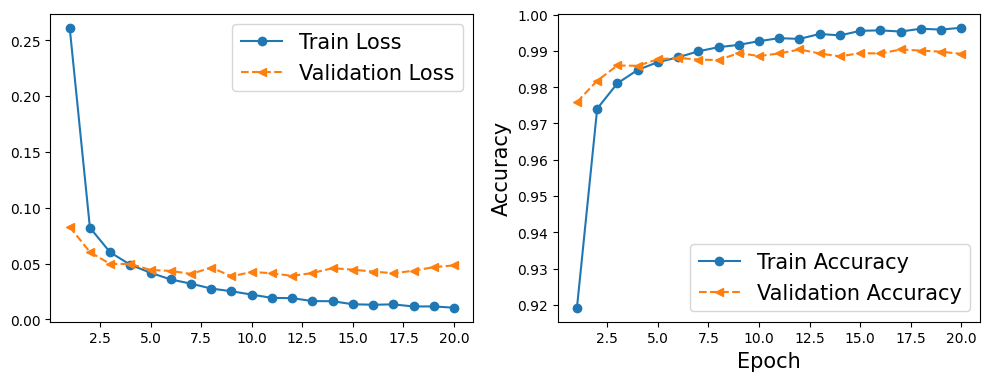

In [ ]:
import matplotlib.pyplot as plt

x_arr = np.arange(len(hist[0])) + 1
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist[0], "-o", label="Train Loss")
ax.plot(x_arr, hist[1], "--<", label="Validation Loss")
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist[2], "-o", label="Train Accuracy")
ax.plot(x_arr, hist[3], "--<", label="Validation Accuracy")
ax.legend(fontsize=15)
ax.set_xlabel("Epoch", size=15)
ax.set_ylabel("Accuracy", size=15)
plt.show()

In [ ]:
pred = model(mnist_test_dataset.data.unsqueeze(1) / 255.)
is_correct = (torch.argmax(pred, dim=1) == mnist_test_dataset.targets).float()
print(f"Test accuracy: {is_correct.mean():.4f}")

Test accuracy: 0.9910


In [ ]:
mnist_test_dataset.data.unsqueeze(1).shape

torch.Size([10000, 1, 28, 28])

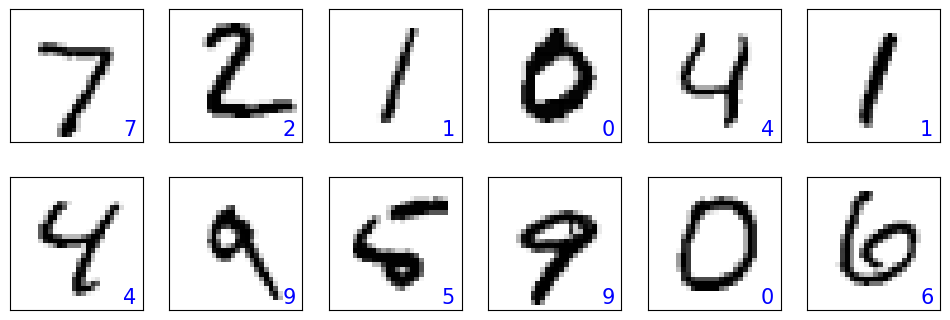

In [ ]:
fig = plt.figure(figsize=(12, 4))
for i in range(12):
  ax = fig.add_subplot(2, 6, i+1)
  ax.set_xticks([])
  ax.set_yticks([])
  img = mnist_test_dataset[i][0]
  pred = model(img.unsqueeze(0))
  y_pred = torch.argmax(pred, dim=1)
  ax.imshow(img[0,:,:], cmap="gray_r")
  ax.text(0.9, 0.1, y_pred.item(),
            size=15, color="blue",
            horizontalalignment="center",
            verticalalignment="center",
            transform=ax.transAxes)
plt.show()